# **MCO1 - Labor Force Survey 2016**

#### Group: **K-Means Business**

**Dy**, Harmony

**Hernandez**, Christa

**Sanchez**, Matthew

**Uy**, Justine

## Section 1. Introduction to the problem/task and dataset

The dataset the group have chosen is Labor Force Survey 2016. This dataset mainly revolves around the employment and labor force participation of household members in the Philippines, while also capturing key demographic and socio-economic characteristics of the population. The target task is a **classification task** that aims to predict whether or not the respondent has done any work for at least one hour during the past week.

## Section 2. Description of the dataset

<b>Description of the Dataset</b>

The Labor Force Survey (LFS), April 2016 data set describes the demographic and socio-economic characteristics of the population mainly through the estimation of levels of employment, unemployment, and underemployment in the 17 administrative regions of the Philippines. It aims to provide a quantitative framework for the preparation of plans and formulation of policies affecting the labor market.

<b> Data Collection </b>

The data collection was conducted face-to-face within a total national sample of 42,768 sample households (rounds with Batanes sample) or 42,576 sample households (rounds without Batanes sample) per survey round (quarterly in a year). This specific data set was collected from April 8, 2016 until April 30, 2016. To ensure the data set had proportional representation among the samples, the PSA designed a master sample which ensures a randomly assigned and selected set of geographic areas with non-overlapping and discernable boundaries known as PSUs. 

As the data collection method utilized a randomized sampling approach, the data collected is well representative of the national and regional statistics. With their systematic survey execution, a high-response rate of 95.7% was achieved which minimizes nonresponse bias.

However, due to the survey only including participants from private households and excluding people from the institutional population, the survey might potentially be underestimating labor force statistics and creating less accurate results.

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv("PHL-PSA-LFS-2016-Q2-PUF/LFS PUF April 2016.CSV")

display(df.head())
display(df.info())

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

None

<b>Row and Column Representation </b>

Each row represents an individual respondent which covers all household members of the sample households that meets their criteria to be considered. Each column represents a feature which describes the demographic and socio-economic chaacteristics of a respondent.

<b>Instances</b>

The data set contains a number of 42,768 instances (corresponding to households including the Batanes sample) or 42,576 instances (corresponding to households excluding the Batanes sample).

<b>Features</b>

There are 50 features in the dataset.

<b>Important Files</b>

LFS PUF April 2016.CSV: Data set file containing instances of the  responses from the survey.
lfs_april_2016_metadata(dictionary).xlsx: A PDF file containing a study description. From this, Coverage, Sampling, Data Collection, and Data Processing were mainly used.

<b>Feature Descriptions</b>

<b>PUFREG</b>: An integer value representing the administartive region where the respondent resides.

<b>PUFPRV</b>: An integer value representing the numerical code of the respondent's province, also called Province Code. 

<b>PUFPRRCD</b>: An integer value representing a recoded verson of the province code, also called Province Recode.

<b>PUFHHNUM</b>: An integer representing a unique identifier for each household.

<b>PUFURB2K10</b>: A binary value indicating whether a household is in an urban or rural area based on the FIES 2010 Survey. (0 = Rural and 1 = Urban)

<b>PUFPWGTFIN</b>: A float value corresponding to the final weight factor of each respondent which is used to scale or project survey results to the national level. 

<b>PUFSVYMO</b>: An integer value corresponding to the month the survey was conducted. It is a categorical value which means that 1 corresponds to January, 2 to February and so on.

<b>PUFSVYYR</b>: An integer value corresponding to the year the survey was conducted. 

<b>PUFPSU</b>: An integer value corresponding to a respondent's Primary Sampling Unit (PSU) identifier.

<b>PUFRPL</b>: An integer value corresponding to a replicate of a responder's Primary Sampling Unit (PSU) identifier.

<b>PUFHHSIZE</b>: An integer value corresponding to the total number of members in a household, also called Household Size.

<b>PUFC01_LNO</b>: An integer value corresponding to a respondent's unique identifier within a household.

<b>PUFC03_REL</b>: An integer value representing the relationship of the respondent to the household head. It is a categorical value which means that 1 corresponds to Head, 2 is Spouse, 3 is Son/Daughter and so on.

<b>PUFC04_SEX</b>: A binary value corresponding to the gender of the respondent. (0 = Female and 1 = Male)

<b>PUFC05_AGE</b>: An integer value corresponding to the respondent's age at the last birthday.

<b>PUFC06_MSTAT</b>: An integer value corresponding to the respondent's marital status. It is a categorical value which means that 1 corresponds to Single, 2 is Marries, 3 is Widowed and so on.

<b>PUFC07_GRADE</b>: An integer value corresponding to the highest level of education obtained. It is a categorical value which means that 000 corresponds to No grade completed, 010 is Preschool, 210 is Grade 1 and so on.

<b>PUFC08_CURSCH</b>: A binary value corresponding to whether the respondent is currently attending school. (0 = No and 1 = Yes)

<b>PUFC09_GRADTECH</b>: A binary value corresponding to whether the respondent is a graduate of a technical/vocational course. (0 = No and 1 = Yes)

<b>PUFC10_CONWR</b>: An integer value corresponding to the category of OFW.  It is a categorical value which means that 1 corresponds to OCW, 2 is Workers other than OCW, 3 is Employees in Phil. Embassy, Consulates & other missions and so on.

<b>PUFC11_WORK</b>: A binary value corresponding to whether the respondent do any work for at least one house during the past week. (0 = No and 1 = Yes)

<b>PUFC12_JOB</b>: A binary value corresponding to whether the respondent have a job or business during the past week despite not working last week. (0 = No and 1 = Yes)

<b>PUFC14_PROCC</b>: A integer value representing the respondent's primary occupation during the past week. It is a categorical value. (No legend provided)

<b>PUFC16_PKB</b>: An integer value representing the kind of business or industry the respondent's employed in. It is a categorical value. (No legend provided)

<b>PUFC17_NATEM</b>: An integer value representing the respondent's nature of employment. It is a categorical value which means that 1 corresponds to permanent, 2 is short-term or seasonal, 3 is different employer on day to day or week to week basis.

<b>PUFC18_PNWHRS</b>: An integer value corresponding to the respondent's normal working hours per day. 

<b>PUFC19_PHOURS</b>: An integer value corresponding to the respondent's total number of hours worked during the past week including non-paid hours. 

<b>PUFC20_PWMORE</b>: A binary value representing whether the respondent wants more hours of work during the past week. (0 = No and 1 = Yes)

<b>PUFC21_PLADDW</b>: A binary value representing whether the respondent looked for additional work during the past week. (0 = No and 1 = Yes)

<b>PUFC22_PFWRK</b>: A binary value representing whether it was the first time the respondents worked. (0 = No and 1 = Yes)

<b>PUFC23_PCLASS</b>: An integer value corresponding to the relationship of the respondent to where he works. It is a categorical value which means that 0 corresponds to worked for private household, 1 is worked for private establishment, 2 is worked for government corporation and so on.

<b>PUFC24_PBASIS</b>: An integer value corresponding to the method of payment for the respondent's primary occupation. It is a categorical value which means that 0 corresponds to in kind/imputed, 1 is per piece, 2 is per hour and so on.

<b>PUFC25_PBASIC</b>: An integer value corresponding to the basic pay for normal time of the respondent prior to deductions. 

<b>PUFC26_OJOB</b>: A binary value representing whether or not the respondent has had another job or business during the past week. (0 = No and 1 = Yes)

<b>PUFC27_NJOBS</b>: An integer value corresponding to the total number of jobs held by the respondent during the past week. 

<b>PUFC28_THOURS</b>: An integer value corresponding to the total hours the respondent worked across all jobs during the past week.

<b>PUFC29_WWM48H</b>: An integer value representing the main reason for the respondent working more than 48 hours in the past week. It is a categorical value which means that 1 corresponds to wanted more earnings, 2 is requirements of the job, 3 is exceptional week and so on.  

<b>PUFC30_LOOKW</b>: A binary value indicating whether the respondent look for work or try to establish a business in the past week. (0 = No and 1 = Yes)

<b>PUFC31_FLWRK</b>: A binary value indicating whether the respondent was look for work or try to establish a business for the first time. (0 = No and 1 = Yes)

<b>PUFC32_JOBSM</b>: An integer value representing the respondent's methods to find work. It is a categorical value which means that 1 corresponds to registered in public employment agency, 2 is registered in private employment agency, 3 is approached employer directly and so on.  

<b>PUFC33_WEEKS</b>: An integer value corresponding to the number of weeks the respondent has been looking for work.

<b>PUFC34_WYNOT</b>: An integer value representing the reason the respondent isn't looking for work. It is a categorical value which means that 1 corresponds to Tired/Believed no work available, 2 is Awaiting results of previous job application, 3 is Temporary illness/disability and so on.  

<b>PUFC35_LTLOOKW</b>: An integer value value representing the last time the respondent has looked for work. It is a categorical value which means that 1 corresponds to Within the last month, 2 is One to six months ago, 3 is More than six months ago.  

<b>PUFC36_AVAIL</b>: A binary value indicating whether the respondent would have been available for an opportunity last week or within two weeks. (0 = No and 1 = Yes)

<b>PUFC37_WILLING</b>: A binary value indicating whether the respondent was willing to work in the past week or within 2 weeks. (0 = No and 1 = Yes)

<b>PUFC38_PREVJOB</b>: A binary value indicating whether the respondent has worked before. (0 = No and 1 = Yes)

<b>PUFC40_POCC</b>: An integer value value representing the respondent's last occupation. It is a categorical value. (No legend provided)

<b>PUFC41_WQTR</b>: A binary value indicating whether the respondent has worked at all or business during the past quarter. (0 = No and 1 = Yes)

<b>PUFC43_QKB</b>: An integer value value representing the respondent's kind of business for the past quarter. It is a categorical value. (No legend provided)

<b>PUFNEWEMPSTAT</b>: An integer value value representing the respondent's employment status based on a new classificaion criteria used in the LFS. It is a categorical value. (No legend provided)


## Section 3. List of requirements

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer


## Section 4. Data preprocessing and cleaning

It is good practice to first make a copy of the dataframe in order to preserve the original data for any future comparison and analysis.

First, check for any duplicate instances in the dataset in order to be drop any repetitions.

In [29]:
clean_df = df

duplicate_count = clean_df.duplicated().sum()
print(f"Duplicated instances: {duplicate_count}")

Duplicated instances: 0


The output shows no duplicated entries.

Next, we want to find any null values in our dataset. Although upon using `.isnull()` function, it shows that there are no null values in the dataset which is inconsistent when opening the csv file. We came to a realization that some of the values were actually whitespaces due to the nature of the dataset which came from a survey questionnaire.

In [30]:
print(clean_df.isnull().sum())
print((clean_df == ' ').sum()) 

PUFREG             0
PUFPRV             0
PUFPRRCD           0
PUFHHNUM           0
PUFURB2K10         0
PUFPWGTFIN         0
PUFSVYMO           0
PUFSVYYR           0
PUFPSU             0
PUFRPL             0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC30_LOOKW       0
PUFC31_FLWRK       0
PUFC32_JOBSM       0
PUFC33_WEEKS       0
PUFC34_WYNOT       0
PUFC35_LTLOOKW     0
PUFC36_AVAIL       0
PUFC37_WILLING     0
PUFC38_PREVJOB     0
PUFC40_POCC        0
PUFC41_WQTR  

Before we perform further processing for any possible missing values, it's easier to work with them if they are of the same data type. To ensure empty-like data types (whitespaces, tab spaces, newlines, etc) are unified, we will convert them into null values.

In [31]:
clean_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print(clean_df.isnull().sum())

#clean_df.to_csv(r"C:\Users\Matthew Sanchez\Desktop\3rdYr\T2\STINTSY\cleaned_LFS_PUF_April_2016.csv", index=False)

PUFREG                  0
PUFPRV                  0
PUFPRRCD                0
PUFHHNUM                0
PUFURB2K10              0
PUFPWGTFIN              0
PUFSVYMO                0
PUFSVYYR                0
PUFPSU                  0
PUFRPL                  0
PUFHHSIZE               0
PUFC01_LNO              0
PUFC03_REL              0
PUFC04_SEX              0
PUFC05_AGE              0
PUFC06_MSTAT        18339
PUFC07_GRADE        18339
PUFC08_CURSCH      107137
PUFC09_GRADTECH     57782
PUFC10_CONWR        57782
PUFC11_WORK         21894
PUFC12_JOB          93306
PUFC14_PROCC       108360
PUFC16_PKB         108360
PUFC17_NATEM       109507
PUFC18_PNWHRS      109507
PUFC19_PHOURS      109507
PUFC20_PWMORE      109507
PUFC21_PLADDW      109507
PUFC22_PFWRK       109507
PUFC23_PCLASS      109507
PUFC24_PBASIS      138947
PUFC25_PBASIC      144274
PUFC26_OJOB        109507
PUFC27_NJOBS       174924
PUFC28_THOURS      109507
PUFC29_WWM48H      163629
PUFC30_LOOKW       132692
PUFC31_FLWRK

Before doing further processes, it is best to determine the relevant features needed for the classification task.

Since the classification task will determine if the household member has done any work for at least an hour over the past week, we wil use Scikit-Learn's feature selection methods to identify the most relevant predictors of `PUFC11_WORK`, focusing on their statistical significance in relation to the label.

In [32]:
# Step 1: Initialize and apply the imputer to fill missing values
imputer = SimpleImputer(strategy="most_frequent")
clean_df[:] = imputer.fit_transform(clean_df)

# Step 2: Define Features (X) and Target (y)
X = clean_df.drop(columns=["PUFC11_WORK"])  # Features
y = clean_df["PUFC11_WORK"]  # label

# Step 3: Perform feature selection (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Step 4: Get selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

# Step 5: Create a DataFrame with only the selected features + target
cleaned_selected_df = clean_df[selected_features.tolist() + ["PUFC11_WORK"]]

display(cleaned_selected_df.isnull().sum())
display(cleaned_selected_df)

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['PUFC01_LNO', 'PUFC03_REL', 'PUFC05_AGE', 'PUFC06_MSTAT',
       'PUFC14_PROCC', 'PUFC16_PKB', 'PUFC17_NATEM', 'PUFC19_PHOURS',
       'PUFC20_PWMORE', 'PUFC21_PLADDW', 'PUFC23_PCLASS', 'PUFC38_PREVJOB',
       'PUFC41_WQTR', 'PUFC43_QKB', 'PUFNEWEMPSTAT'],
      dtype='object')


PUFC01_LNO        0
PUFC03_REL        0
PUFC05_AGE        0
PUFC06_MSTAT      0
PUFC14_PROCC      0
PUFC16_PKB        0
PUFC17_NATEM      0
PUFC19_PHOURS     0
PUFC20_PWMORE     0
PUFC21_PLADDW     0
PUFC23_PCLASS     0
PUFC38_PREVJOB    0
PUFC41_WQTR       0
PUFC43_QKB        0
PUFNEWEMPSTAT     0
PUFC11_WORK       0
dtype: int64

,PUFC01_LNO,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC14_PROCC,PUFC16_PKB,PUFC17_NATEM,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC23_PCLASS,PUFC38_PREVJOB,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT,PUFC11_WORK
0,1,1,49,2,61,01,1,024,1,1,3,1,1,01,1,1
1,2,2,61,2,92,01,2,008,2,2,6,1,1,01,1,1
2,3,3,19,1,92,01,2,024,1,1,1,1,1,01,1,1
3,1,1,48,2,61,01,1,020,1,1,3,1,1,01,1,1
4,2,2,41,2,91,96,1,072,2,2,0,1,1,96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,1,1,29,2,13,50,1,040,2,2,4,1,1,50,1,1
180858,2,2,29,2,92,01,1,048,2,2,1,2,1,01,3,2
180859,3,3,4,1,92,01,1,048,2,2,1,1,1,01,1,2
180860,4,3,2,1,92,01,1,048,2,2,1,1,1,01,1,2


After imputation, we noticed that soe cells has leading zeroes, we want to remove them for consistent analysis.

In [33]:
numeric_columns = [
    "PUFC01_LNO", "PUFC03_REL", "PUFC05_AGE", "PUFC06_MSTAT",
    "PUFC14_PROCC", "PUFC16_PKB", "PUFC17_NATEM", "PUFC19_PHOURS",
    "PUFC20_PWMORE", "PUFC21_PLADDW", "PUFC23_PCLASS", "PUFC38_PREVJOB",
    "PUFC41_WQTR", "PUFC43_QKB", "PUFNEWEMPSTAT", "PUFC11_WORK"
]

# Convert these columns to integers to remove any leading zeros
cleaned_selected_df[numeric_columns] = cleaned_selected_df[numeric_columns].astype(int)
display(cleaned_selected_df.head())

C:\Users\chris\AppData\Local\Temp\ipykernel_14216\657408775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_selected_df[numeric_columns] = cleaned_selected_df[numeric_columns].astype(int)


,PUFC01_LNO,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC14_PROCC,PUFC16_PKB,PUFC17_NATEM,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC23_PCLASS,PUFC38_PREVJOB,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT,PUFC11_WORK
0,1,1,49,2,61,1,1,24,1,1,3,1,1,1,1,1
1,2,2,61,2,92,1,2,8,2,2,6,1,1,1,1,1
2,3,3,19,1,92,1,2,24,1,1,1,1,1,1,1,1
3,1,1,48,2,61,1,1,20,1,1,3,1,1,1,1,1
4,2,2,41,2,91,96,1,72,2,2,0,1,1,96,1,1


## Section 5. Exploratory data analysis

## Section 6. Initial model training

### Logistic Regression

In this section, we will make and train a logistic regression model using sklearn's `SGDClassifier`.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

**Binomial Logistic Regression**
1. Split Data into Train Set and Test Set
2. Visualization of Data : Scatter plots of train and test data.
3. Model Definition and Training
4. Model Evaluation

In [ ]:
# Load dataset
file_path = r"C:\Users\chris\OneDrive - De La Salle University - Manila\Documents\APDEV\MCO1\STINTSY_MCO1\PHL-PSA-LFS-2016-Q2-PUF\LFS PUF April 2016.CSV"
df = pd.read_csv(file_path)

The PUFC11_WORK column has three unique values:

`2`: 87,556 occurrences

`1`: 71,412 occurrences

Blank values: 21,894 entries (likely missing data)

* `1` and `2` likely indicate whether the person worked last week (`1 = Yes`, `2 = No`).

* Missing values may correspond to individuals not applicable for this question.

In [ ]:
# Preprocess PUFC11_WORK (Target Variable)
df["PUFC11_WORK"] = df["PUFC11_WORK"].astype(str).str.strip()
df = df[df["PUFC11_WORK"] != ""] 
df["PUFC11_WORK"] = df["PUFC11_WORK"].astype(int)
df["PUFC11_WORK"] = df["PUFC11_WORK"].apply(lambda x: 1 if x == 1 else 0)

The `PUFC11_WORK` column, which indicates whether an individual worked last week, needed to be cleaned and converted into a binary format suitable for logistic regression. First, the column was converted to a string type and stripped of any leading or trailing spaces to ensure consistency. Next, rows where `PUFC11_WORK` had missing values (blanks) were removed to prevent issues during model training. The remaining values, originally encoded as `1` (Worked) and `2` (Did not work), were converted into a binary format where `1` remained the same and `2` was mapped to `0`. This transformation ensures that the target variable aligns with a standard binary classification setup, where `1` represents the positive class (worked last week) and `0` represents the negative class (did not work last week).

 Select relevant predictor variables for logistic regression that might affect employment status.

* `PUFHHSIZE`: Household size
* `PUFC04_SEX`: Sex
* `PUFC05_AGE`: Age
* `PUFC06_MSTAT`: Marital status
* `PUFC07_GRADE`: Highest grade completed
* `PUFC08_CURSCH`: Currently in school
* `PUFC09_GRADTECH`: Graduated from technical school

These variables cover demographics, education, and household characteristics, which are likely to influence employment.

In [39]:
# Select Relevant Features
selected_features = ["PUFHHSIZE", "PUFC04_SEX", "PUFC05_AGE", "PUFC06_MSTAT", 
                     "PUFC07_GRADE", "PUFC08_CURSCH", "PUFC09_GRADTECH"]

In [40]:
# Convert categorical variables to string (for one-hot encoding)
for col in selected_features:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str)

This ensures that the categorical variables are treated as strings before encoding. And it helps avoid issues when applying one-hot encoding. One-hot encoding converts categorical variables into binary columns.

In [41]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df[selected_features], drop_first=True)

In [53]:
# Re-adds the target variable (PUFC11_WORK) to the encoded dataset.
df_encoded["PUFC11_WORK"] = df["PUFC11_WORK"]

To prepare for model training, the dataset is divided into features (`X`) and the target variable (`y`). The target variable, `PUFC11_WORK`, is removed from `X`, ensuring that only predictor variables remain. The data is then split into an **80%** training set and a **20%** test set using `train_test_split()`, with stratification to maintain the same proportion of employed and unemployed individuals in both subsets.

Since the dataset is large and training on the entire set could cause memory issues, a random subset of **20,000** samples is selected from the training set. This ensures that the model can be trained efficiently without excessive memory consumption.

In [54]:
# Split data (use a smaller subset for training to avoid memory issues)
X = df_encoded.drop(columns=["PUFC11_WORK"])
y = df_encoded["PUFC11_WORK"]

# Reduce training size for efficiency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train_sample, y_train_sample = X_train.sample(n=20000, random_state=1), y_train.sample(n=20000, random_state=1)

# Print dataset split details
print(f"Training set: {len(X_train)} samples (80%)\n")
print(f"Test set: {len(X_test)} samples (20%)\n")

Training set: 127174 samples (80%)

Test set: 31794 samples (20%)



A logistic regression model is trained using **stochastic gradient descent (SGD)** via `SGDClassifier`. Unlike traditional logistic regression, SGDClassifier processes the dataset in smaller batches, making it more memory-efficient for large datasets. The model is configured with `loss='log_loss'`, which specifies logistic regression as the loss function. It is trained for a maximum of 200 iterations, using a constant learning rate of **0.001**, ensuring a gradual and stable learning process.

In [45]:
# Train Logistic Regression using SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=200, learning_rate='constant', eta0=0.001, random_state=1)
model.fit(X_train_sample, y_train_sample)

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=1)

Once the model is trained, it is used to predict employment status for the test set. The predicted values are compared against the actual employment labels, and the accuracy score is calculated. A classification report is also generated, which provides precision, recall, and F1-score for both classes (worked vs. did not work). This evaluation helps determine how well the model generalizes to new, unseen data. The accuracy score is displayed, along with a breakdown of the model’s performance in distinguishing between employed and unemployed individuals.

In [46]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [47]:
# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Test Accuracy: 0.7570
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     17511
           1       0.74      0.72      0.73     14283

    accuracy                           0.76     31794
   macro avg       0.75      0.75      0.75     31794
weighted avg       0.76      0.76      0.76     31794



To understand the distribution of employment status, a scatter plot is generated, mapping **Age vs. Household Size** from the training dataset. Each data point is colored based on whether the individual worked last week (`PUFC11_WORK`), with a coolwarm color map distinguishing between those who worked (red) and those who did not (blue). This visualization provides insight into patterns, such as whether younger individuals or those in larger households are more or less likely to be employed.

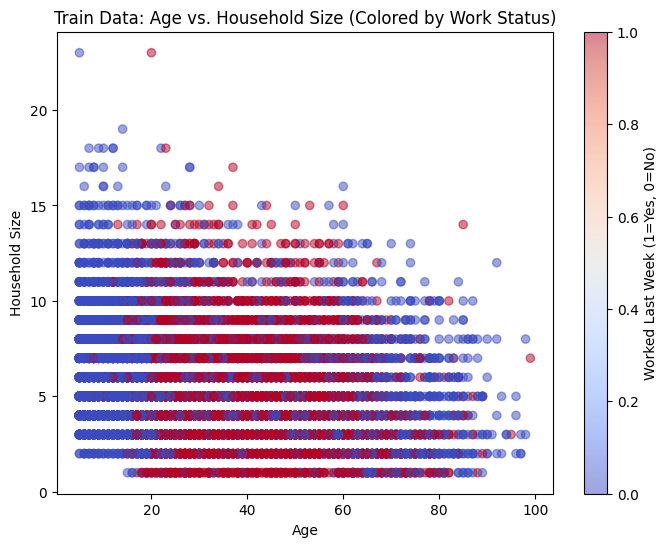

In [48]:
# Visualization: Age vs. Household Size (Train Data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_sample["PUFC05_AGE"], X_train_sample["PUFHHSIZE"], c=y_train_sample, alpha=0.5, cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Household Size")
plt.title("Train Data: Age vs. Household Size (Colored by Work Status)")
plt.colorbar(label="Worked Last Week (1=Yes, 0=No)")
plt.show()

The Age vs. Household Size scatter plot was chosen because these two features are likely to have an impact on employment status, and they provide an intuitive way to visualize patterns in the data. Here’s why these specific variables were selected:

1. **Age** (`PUFC05_AGE`)

    * Age is one of the strongest predictors of employment.

    * Younger individuals (e.g., students) and older individuals (e.g., retirees) might have different employment rates compared to those in their prime working years (20-50 years old).

    * This variable can help reveal whether employment likelihood follows a certain age trend.

2. **Household Size** (`PUFHHSIZE`)

    * Household size can impact employment decisions, especially in economies where family support plays a role in financial decisions.

    * Individuals in larger households might be less likely to work if they have financial support from other family members.

    * Conversely, those in smaller households may have more financial responsibility, making them more likely to be employed.

**Why Visualize These Two Together?**
* A 2D scatter plot requires two numerical variables for meaningful visualization.

* While many categorical features (e.g., education, marital status) also influence employment, they are better suited for statistical analysis rather than direct plotting.

* By plotting Age vs. Household Size and coloring points by employment status, we can observe any underlying trends or clusters in the dataset.

## Section 7. Error analysis

## Section 8. Improving model performance

## Section 9. Model performance summary

## Section 10. Insights and conclusions

## Section 11. References